"""
ÖDEV Açıklama:

Ödev aşağıdaki adımlarla ilerlemektedir. Python dosyasında "###  ###" açıklama satırlarından 
sonra gelen yerlerin doldurulması beklenilmektedir.

1- Kendi Elinizi içeren resmi (el_tespiti_1.jpg olarak) open cv kütüphanesini kullanarak yükleyeceğiz.
2- Gri ton (gray scale) formatımıza çevireceğiz. 
3- Resmimizin yüksekliğini 960 ve genişliğini 640 yapacağız.
4- Resmimize 10*10 filtre uygulayınız.
5- Resmimizi BGR formatına çevirip, el_tespit_odev.jpg olarak data klasörü içerisine kaydedin. 
6- Resmimizi mediapipe kütüphanesi üzerinden okuyun 
7- Resmimiz üzerinde el tespiti işlemini gerçekleştirin 
8- Resmimizi BGR formatına çevirip, data klasörü altında "el_tespit_odev.jpg" olarak kaydedin.
"""

In [41]:
### kütüphaneler tanımlanır ###
from mediapipe import solutions # El tespiti için görsel işleme görevleri
from mediapipe.framework.formats import landmark_pb2 #  'landmark_pb2' formatı cinsinden verileri almak için 
import numpy as np
import cv2
import matplotlib.pyplot as  plt
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import urllib.request

In [42]:
# Resimin el tespiti yapılmış görsel halinin hesaplanmasını içeren fonksiyon

def draw_landmarkers_on_image(rgb_image,detection_result):
    
    hand_landmarks_list = detection_result.hand_landmarks # Tespit edilen elin işaretlendirmelerini içerir.
    handedness_list = detection_result.handedness # Tespit edilen elin sağ ve sol olma durumu.
    annotated_image = np.copy(rgb_image) # Girdi görüntüsü kopyalanır.
    
    # Tespit edilen elleri işaretlemek için döngü oluşturulur.
    
    for idx in range(len(hand_landmarks_list)):
        hand_landmarks = hand_landmarks_list[idx] # Indexi alarak el işaretlerini alır.
        handedness = handedness_list[idx] # Indexi kullanarak hangi elin tespit edildiğini anlar.
        
        hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList() # 'landmark_pb2' Formatında bir liste oluşturur.
        hand_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x=landmark.x,y=landmark.y,z=landmark.z) for landmark in hand_landmarks
        ])
        
        solutions.drawing_utils.draw_landmarks( # El işaretleri görüntü üzerine çizilir.
            
            annotated_image,
            hand_landmarks_proto,
            solutions.hands.HAND_CONNECTIONS,
            solutions.drawing_styles.get_default_hand_landmarks_style(),
            solutions.drawing_styles.get_default_hand_connections_style()
            
        )
        
        height,width,_ = annotated_image.shape
        x_coordinates = [landmark.x for landmark in hand_landmarks]
        y_coordinates = [landmark.y for landmark in hand_landmarks]
        
        text_x = int(min(x_coordinates) * width)
        text_y = int(min(y_coordinates) * height) - margin
        
        cv2.putText(annotated_image,f"{handedness[0].category_name}",(text_x,text_y),cv2.FONT_HERSHEY_DUPLEX,font_size,handedness_text_color,font_thinckness,cv2.LINE_AA)
    
    return annotated_image


In [43]:
# Elinizi içeren resmi (el_tespiti_1.jpg) open cv ile yüklenir.
image = cv2.imread("data/fikretkarsila.jpg")

In [44]:
# Resmi RGB formatına çeviriniz.
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [45]:
# Resim yüksekliğini 960 genişliğini 640 olarak düzenleyiniz.
image = cv2.resize(image,(960,640))

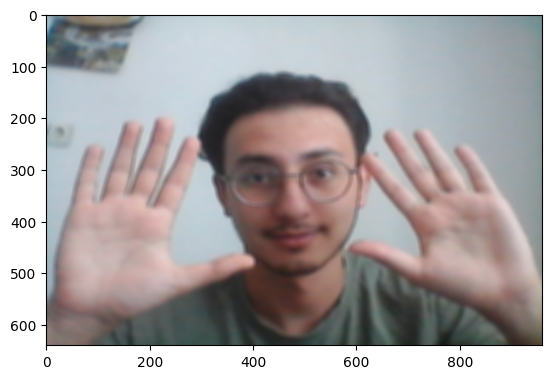

In [46]:
### resim üzerine 10*10 blur ekleyiniz. ###
blur = cv2.blur(image,(10,10))
plt.figure()
plt.imshow(blur)

In [47]:
# BGR formatından RGB formatına resmi çeviriniz.
blur = cv2.cvtColor(blur,cv2.COLOR_BGR2RGB)

In [48]:
# Resmi data klasörü altına "el_tespit_odev_blur.jpg" olarak kaydediniz.

cv2.imwrite("data/el_tespit_odev_blur.jpg",blur)

True

In [49]:
# el_tespit_odev_blur.jpg resmini Mediapipe kütüphanesi üzerinden okunur. 
image = mp.Image.create_from_file("data/el_tespit_odev_blur.jpg")

In [50]:
margin = 10 # Metnin üst köşesinden elin sınırına olan mesafe
font_size = 1 # Yazı tipi boyutu
font_thinckness = 1 # Yazı kalınlığı
handedness_text_color = (255,0,0) #  Kırmızı renk 

In [51]:
url = "https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/hand_landmarker.task"
filename = "hand_landmarker.task"

urllib.request.urlretrieve(url, filename)

('hand_landmarker.task', <http.client.HTTPMessage at 0x1deafadc700>)

In [52]:
base_options = python.BaseOptions(model_asset_path=filename)
options=vision.HandLandmarkerOptions(base_options=base_options,num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

In [53]:
### resimin detect(el tespit edilmiş vektörize halini) oluşturun ###
detection_result = detector.detect(image)
annoted_image = draw_landmarkers_on_image(image.numpy_view(),detection_result)

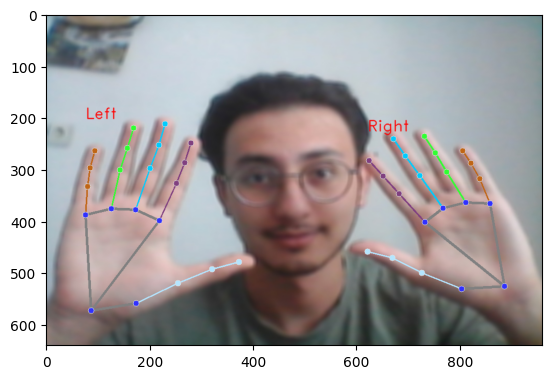

In [54]:
# Resimin el tespiti yapılmış görsel halini hesaplayın.
plt.figure()
plt.imshow(annoted_image)

In [59]:
# Resimin el tespiti yapılmış görsel halini BGR formatına çevirin.
annoted_image = cv2.cvtColor(annoted_image,cv2.COLOR_RGB2BGR)

In [60]:
# Resmi data klasörü içerisine "el_tespit_odev.jpg" olarak kaydedilir. 
cv2.imwrite("data/el_tespit_odev.jpg",annoted_image)

True